In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.6.0


In [2]:
data_path = '.data/expression/'

for expression in os.listdir(data_path):
    print(
        str(len(os.listdir(data_path + expression))) + " " + expression +
        " classes")

7 test classes
7 train classes


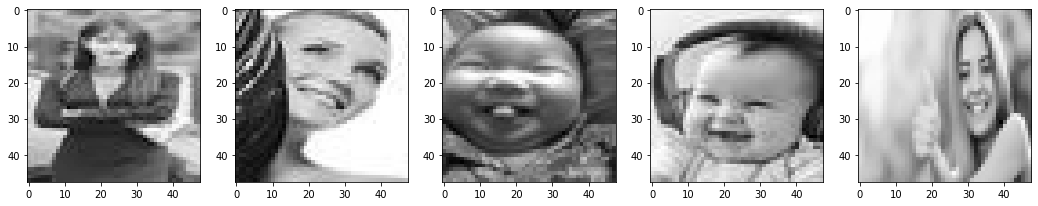

In [6]:
plt.figure(figsize=(18, 10))
for index, img_path in enumerate(glob(data_path + 'train/happy/*.jpg')[:5]):
    image = Image.open(img_path).convert('L')
    image = np.array(image)

    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap='gray')

plt.show()

In [8]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator(horizontal_flip=True)
datagen_validation = ImageDataGenerator(horizontal_flip=True)

In [9]:
train_generator = datagen_train.flow_from_directory(data_path + 'train',
                                                    target_size=(img_size,
                                                                 img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(
    data_path + 'test',
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 28786 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [10]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))ㅇ
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))

In [11]:
opt = Adam(lr=0.0005)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

C:\Users\HP\miniconda3\envs\image-editing\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [12]:
epochs = 10
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

history = model.fit(x=train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=validation_steps)

Epoch 1/10
449/449 [==============================] - 287s 637ms/step - loss: 1.7963 - accuracy: 0.3121 - val_loss: 1.5438 - val_accuracy: 0.4019
Epoch 2/10
449/449 [==============================] - 250s 556ms/step - loss: 1.4780 - accuracy: 0.4337 - val_loss: 1.4495 - val_accuracy: 0.4552
Epoch 3/10
449/449 [==============================] - 293s 652ms/step - loss: 1.3248 - accuracy: 0.4899 - val_loss: 1.2939 - val_accuracy: 0.5106
Epoch 4/10
449/449 [==============================] - 419s 934ms/step - loss: 1.2441 - accuracy: 0.5243 - val_loss: 1.2128 - val_accuracy: 0.5294
Epoch 5/10
449/449 [==============================] - 400s 890ms/step - loss: 1.1934 - accuracy: 0.5464 - val_loss: 1.1958 - val_accuracy: 0.5472
Epoch 6/10
449/449 [==============================] - 427s 950ms/step - loss: 1.1544 - accuracy: 0.5589 - val_loss: 1.1807 - val_accuracy: 0.5459
Epoch 7/10
449/449 [==============================] - 417s 928ms/step - loss: 1.1168 - accuracy: 0.5732 - val_loss: 1.1310 -

In [13]:
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(16, 10))

    for name, history in histories:
        val = plt.plot(history.epoch,
                       history.history['val_' + key],
                       '--',
                       label=name.title() + ' Val')
        plt.plot(history.epoch,
                 history.history[key],
                 color=val[0].get_color(),
                 label=name.title() + ' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    plt.xlim([0, max(history.epoch)])

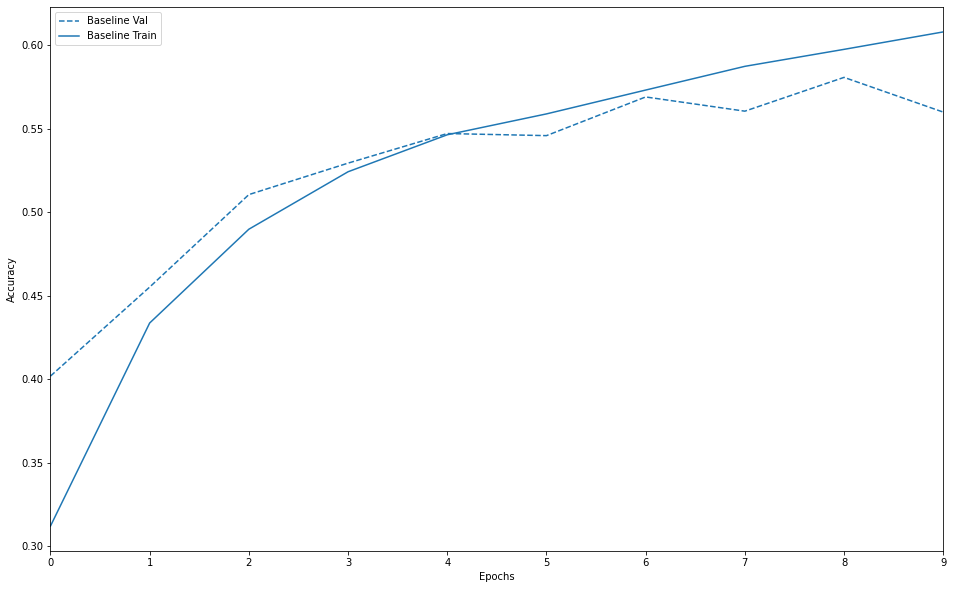

In [14]:
plot_history([('baseline', history)])

In [30]:
model.save('face_expression_model.h5')